# 주성분 분석
### 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인  PCA(주성분 분석) 모델을 만들어 봅니다.

나중에 군집이나 분류에 영향을 끼치지 않으면서 업로드된 사진의 용량을 줄일 수 있을까??

## 차원과 차원 축소

우리는 데이터가 가진 속성을 **특성**이라고 불렀다.

머신러닝에서는 이런 특성을 **차원**이라고도 부른다.

![사진](./dimension.jpeg)

비지도 학습 작업 중 하나인 **차원 축소**알고리즘을 다루어보자.

차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

또 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있다.

이 절에서는 차원 축소 알고리즘인 **주성분 분석**을 배워보자 주성분 분석은 간단히 **PCA**라고도 부른다.

## 주성분 분석 소개

**주성분 분석**은 데이터에 있는 분산이 큰 방향을 찾는 것이다.

**분산**은 데이터가 널리 퍼져있는 정도를 말한다.

분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있다.

![사진](./1.jpeg)

이 데이터는 x1, x2 2개의 특성이 있다. 이 데이터에서 가장 분산이 큰 방향은 어디 일까?

![사진](./2.jpeg)

직관적으로 우리는 길게 늘어진 대각선 방향이 분산이 가장 크다고 알 수 있다.

화살표 위치는 큰 의미 없다. 중요한 것은 분산이 큰 방향을 찾는 것이다.

이 직선이 원점에서 출발한다면 두 원소로 이루어진 벡터로 쓸 수 있다.

![사진](./3.jpeg)

이 벡터를 **주성분**이라고 부른다. 주성분 벡터는 원본 데이터에 있는 어떤 방향이다.

따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.

원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.

다음과 같이 샘플 데이터 s(4,2)를 주성분에 직각으로 투영하면 1차원 데이터 p(4,5)를 만들 수 있다.

![사진](./4.jpeg)

주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다.

주성분이 가장 분산이 큰 방향이기대문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것이다.

그 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다.

여기서는 2차원이기 때문에 두 번째 주성분의 방향은 다음처럼 하나뿐이다.

![사진](./5.jpeg)

일반적으로 주 성분은 원본 특성의 개수만큼 찾을 수 있다.

사이킷런으로 과일 사진 데이터에서 주성분 분석을 수행 해 보자.

## PCA 클래스

이전 절과 마찬가지로 과일 사진 데이터를 다운로드하여 넘파이 배열로 적재하자.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-02-22 16:53:20--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-02-22 16:53:21--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-02-22 16:53:21--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

사이킷런은 sklearn.deomposition 모듈 아래 PCA클래스로 주성분 분석 알고리즘을 제공한다.

n_components 매개변수에 주성분의 개수를 지정해야 한다.

비지도 학습이기 때문에 fit() 매서드에 타깃값을 제공하지 않는다.

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

# PCA클래스가 찾은 주성분은 components_속성에 저장되어 있다. 이 배열의 크기를 확인해보자.
print(pca.components_.shape)

(50, 10000)


n_components=50으로 지정했기 때문에 첫 번째 차원이 50이다. 즉 50개의 주성분을 찾은 것이다.

두번째 차원은 항상 원본 데이터의 특성 개수와 같은 10000이다.

주성분을 100 * 100크기의 이미지처럼 출력해 볼 수 있다.

draw_fruits() 함수를 사용해 이 주성분을 그림으로 그려보자.

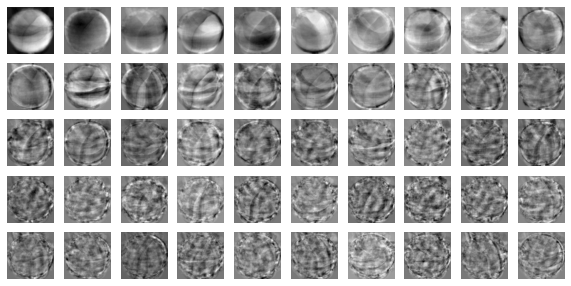

In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 개수이다.
    # 한줄에 10개씩 이미지를 그린다. 샘플 개수를 10개로 나누어 전체 행 개수를 계산한다.
    rows = int(np.ceil(n/10))
    # 행이 1개면 열의 개수는 샘플 개수이다. 그렇지 않으면 10개이다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                           figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.

데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 PCA의 transform()메서드를 사용해 10000개에서 50개로 줄여보자.

In [5]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d는 10000개의 픽셀(특성)을 가진 300개의 이미지였는데

50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300, 50) 크기의 배열로 변환했다.

이제 fruits_pca 배열은 50개의 특성을 가진 데이터이다.

데이터의 차원을 줄였다면 다시 원상 복구할 수도 있을까??

## 원본 데이터 재구성

어느 정도 손실이 발생할 수밖에 없지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당부분 재구성할 수 있다.

50개의 차원으로 축소한 데이터를 전달해 10000개의 특성을 복원해 보자.

In [15]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(frutis_inverse.shape)

(300, 10000)


10000개의 특성이 복원되었다. 이 데이터를 100 * 100 크기로 바꾸어 100개씩 나누어 출력해보자.

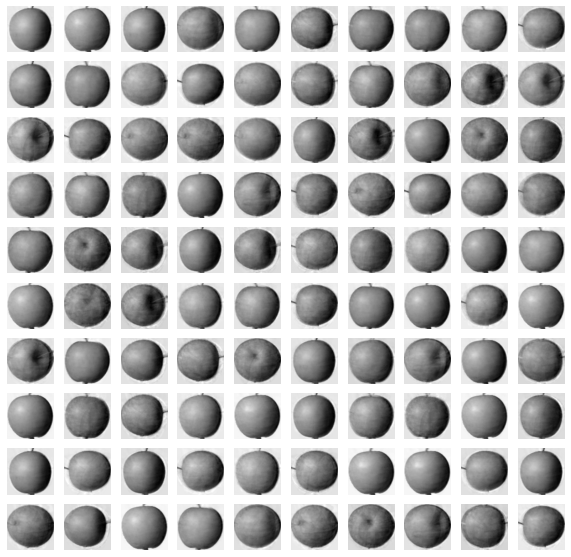

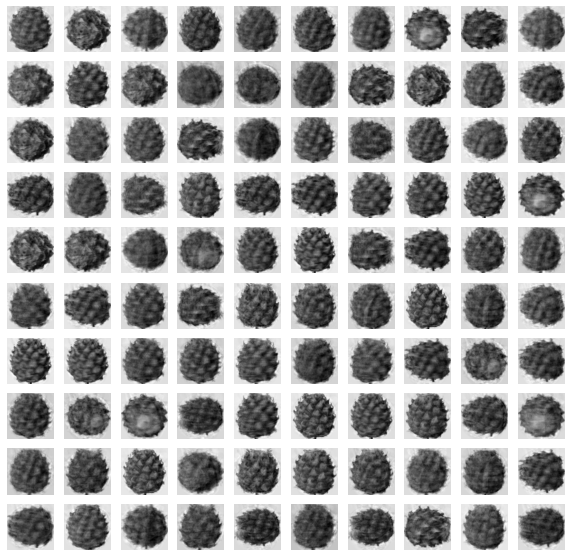

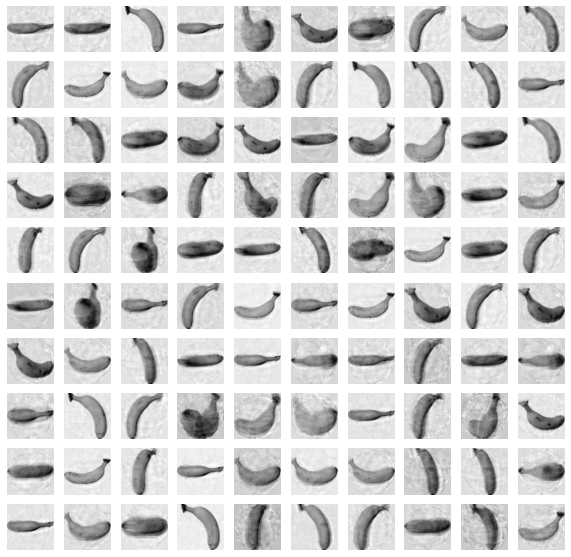

In [16]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산**이라고 한다.

PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다.

분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [17]:
print(np.sum(pca.explained_variance_ratio_))

0.9215774813274824


92%가 넘는 분산을 유지하고 있다. 복원 했을때 원본 이미지의 품질이 높았던 이유가 여기에 있다.

설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는데 도움이 된다.

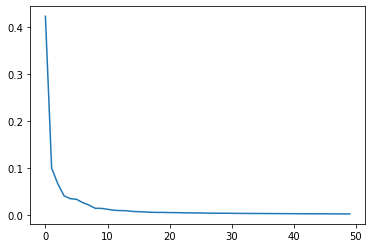

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 대부분의 분산을 표현하고 있다.

이번에는 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련해보자. 원본 데이터를 사용했을때와 어떤 차이가 있는지 보자.

## 다른 알고리즘과 함께 사용하기

3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용해보자.

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 지도 학습 모델을 사용하려면 타깃값이 있어야 한다.
target = np.array([0]*100 + [1]*100 + [2]*100)

# 먼저 원본 데이터인 fruits_2d를 사용해보자. cross_validate()로 교차 검증을 수행한다.
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.2755432605743408


교차 검증의 점수는 0.997로 매우 높다. 금방 과대적합된 모델을 만들기 쉽다. 그리고 0.27초 정도 걸렸다.

이 값을 PCA로 축소한 fruits_pca를 사용했을 때와 비교해보자.

In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02083597183227539


50개의 특성만 사용하였는데 정확도가 100%이고 훈련시간은 0.02로 줄어들었다.

차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.

앞서 주성분의 개수를 지정했는데 대신 원하는 설명된 분산의 비율을 입력할 수도 있다.

설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어보자.

In [26]:
# 주성분 개수 대신 0~1사이의 비율을 실수로 입력하면 된다.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

# 몇개의 주성분을 찾았는지 확인해보자.
print(pca.n_components_)

2


단 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다.

이 모델로 원본 데이터를 변환해보자. 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2)가 될것이다.

In [27]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성만 사용하고도 교차 검증의 결과가 좋을까?

In [29]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.030729198455810548


/home/innoacad06/anaconda3/envs/soum/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/innoacad06/anaconda3/envs/soum/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

2개의 특성을 사용했을 뿐인데 99%의 정확도를 달성했다.

이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자.

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


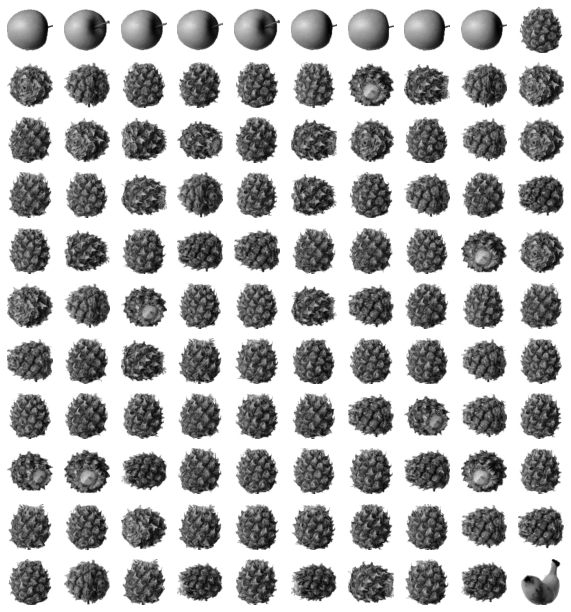

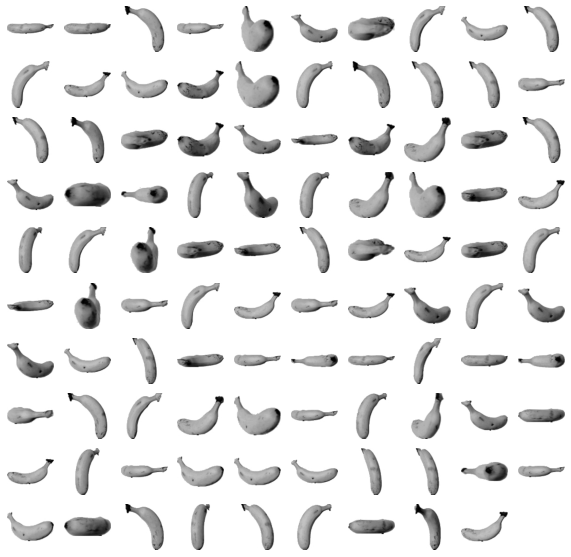

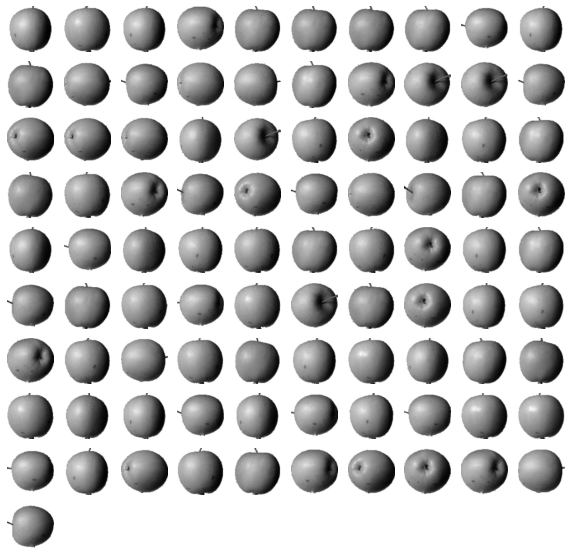

In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

# KMeans가 찾은 레이블을 사용해 과일 이미지를 출력해보자.
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

파인애플은 사과와 조금 혼돈되는 면이 있다.

훈련데이터의 차원을 줄이면 얻을수 있는 장점은 시각화이다.

fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있다.

클러스터별로 나누어 산점도를 그려보자.

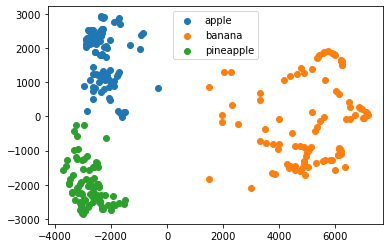

In [33]:
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

클러스터의 산점도가 아주 잘 구분되어있다.

이 그림을 보면 사과와 파인애플 클러스터의 경계가 가깝게 붙어있다. 이 두 클러스터의 샘플은 몇개가 혼동을 일으키기 쉬울것 같다.

데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있다. 그런 면에서 차원 축소는 매우 유용한 도구중 하나이다.

## 주성분 분석으로 차원 축소 <문제해결 과정>

이번 절에서는 대표적인 비지도 학습 문제중 하나인 **차원 축소**에 대해 알아보았다.

차원 축소를 사용하면 데이터셋의 크기를 줄일 수 있고 비교적 시각화하기 쉽다.

성능을 높이거나 훈련 속도를 빠르게 만들 수 있다.

PCA 클래스를 사용해 과일 사진 데이터의 특성을 50개로 크게 줄였다.

원본 데이터에 있는 분산의 90% 이상을 표현한다 이를 **설명된 분산**이라고 한다.

PCA 클래스는 자동으로 설명된 분산을 계산하여 제공한다. 설명된 분산의 비율을 설정하여 원하는 비율만큼 주성분을 찾을 수 있다.

원본 데이터를 복원하는 메서드도 제공한다.

완벽하게 복원되지 않지만 적은 특성으로도 상당 부분의 디테일을 복원할 수 있다.